In [2]:
## STANDARD PYTHON LIBS
import os
import re
import sys
import cv2
import PIL
import math
import time
import random
import scipy.misc
import skimage.io
import skimage.transform
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## ADDING TO ROOT
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '../'))
sys.path.append(ROOT_DIR)

## CUSTOM LIBS
import src.utils as utils
import src.model as modellib
from src.config import Config
import src.visualize as visualize

# GPU LIBS
import keras
import tensorflow as tf

print ('TF : ', tf.__version__, '  Keras : ', keras.__version__)

# if utils.check_gpu(verbose=0):
#     pass
# else:
#     sys.exit(1)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TF :  1.6.0   Keras :  2.1.4


Using TensorFlow backend.


In [34]:
if 'src.mapillary' in sys.modules : del sys.modules['src.mapillary']
import src.mapillary as mapillary
if __name__ == "__main__":
    url_dataset = '/home/play/GOD_DATASET/open_datasets/mapillary'
    mapillary_mapper = '/home/play/playment/production/Mask_RCNN/demo/raw/merge__cityscapes_mapillary_v2.json'
    mapillary_config = mapillary.MapillaryConfig()
    
    trainData = mapillary.MapillaryDataset(url_dataset, mapillary_mapper, mapillary_config, data_type = 'train')
    valData = mapillary.MapillaryDataset(url_dataset, mapillary_mapper, mapillary_config, data_type = 'val')

Mode : train has 18000 images
Mode : val has 2000 images


 - Instance URL : /home/play/GOD_DATASET/open_datasets/mapillary/mapillary-vistas-dataset_public_v1.0/training/instances/eqBRayZgU2P4QW20wxRjXg.png
 - Total Masks :  15
 - Playment Classes :  {1: 3, 19: 1, 21: 1, 24: 7, 9: 2, 28: 1}
 --> Class ID : 19 || Instance ID : 0
 - Total Printed Masks :  27


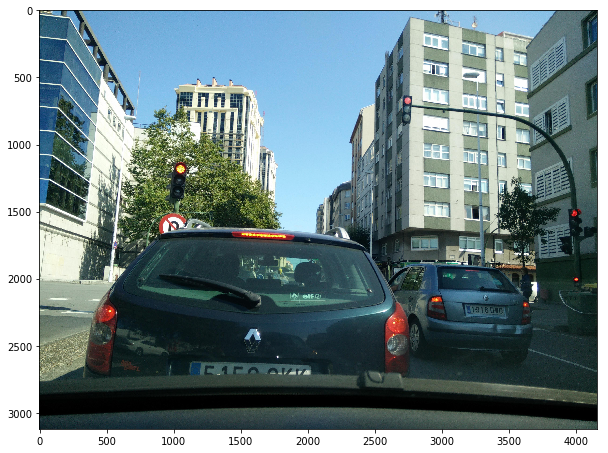

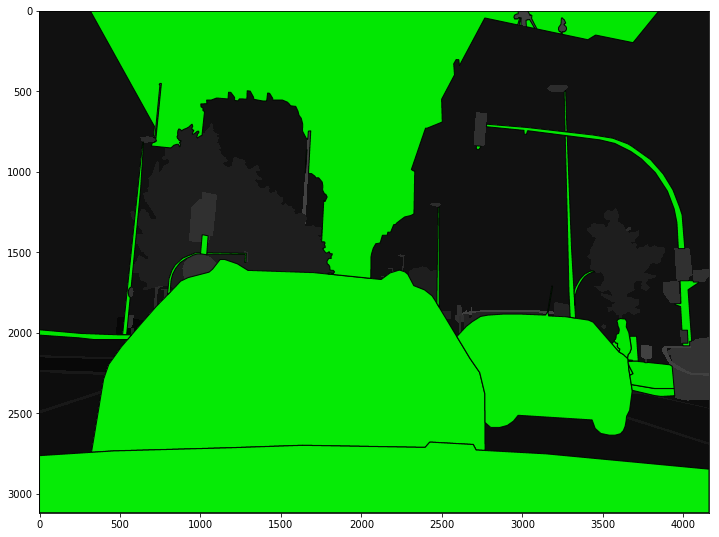

In [35]:
idx, show = 1200, True
img = trainData.load_image(idx, show=show)
masks, class_ids = trainData.load_mask(idx, show=show, verbose=True)

 - Instance URL : /home/play/GOD_DATASET/open_datasets/mapillary/mapillary-vistas-dataset_public_v1.0/validation/instances/Z0E24EWzpWAuitDCa0pxHw.png
 - Total Masks :  17
 - Playment Classes :  {1: 5, 3: 1, 21: 1, 24: 8, 9: 1, 28: 1}
 --> Class ID : 1 || Instance ID : 0
 --> Class ID : 9 || Instance ID : 0
 --> Class ID : 9 || Instance ID : 0
 - Total Printed Masks :  37


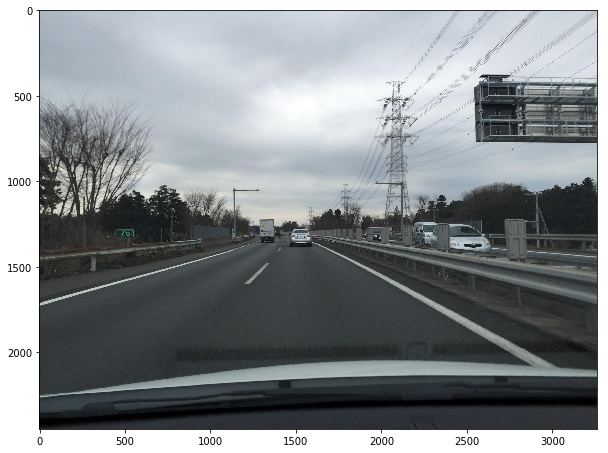

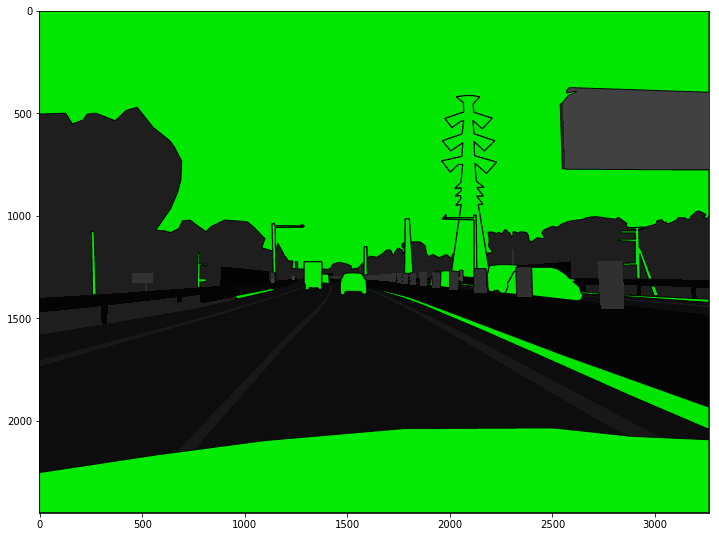

In [36]:
idx, show = 1200, True
img = valData.load_image(idx, show=show)
masks, class_ids = valData.load_mask(idx, show=show, verbose=True)

# TRAINING

In [42]:
if 'src.model' in sys.modules : del sys.modules['src.model']
import src.model as modellib
    
MODEL_DIR = os.path.join(ROOT_DIR, 'demo', 'model', 'logs')
COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'demo', 'model', "mask_rcnn_coco.h5")
model = modellib.MaskRCNN(mode="training", config=mapillary_config, model_dir=MODEL_DIR)

init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    model.load_weights(model.find_last()[1], by_name=True)

In [43]:
model.train(trainData, valData, 
            learning_rate=mapillary_config.LEARNING_RATE, 
            epochs=2, 
            layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: /home/play/playment/production/Mask_RCNN/demo/model/logs/mapillary20180314T1337/mask_rcnn_mapillary_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv

ERROR:root:Error processing image {'id': 931, 'source': 'mapillary', 'path': '/home/play/GOD_DATASET/open_datasets/mapillary/mapillary-vistas-dataset_public_v1.0/validation/images/T3Zn_5-mWPvLlAoQn2dw2w.jpg'}
Traceback (most recent call last):
  File "/home/play/playment/production/Mask_RCNN/src/model.py", line 1645, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/play/playment/production/Mask_RCNN/src/model.py", line 1201, in load_image_gt
    mask, class_ids = dataset.load_mask(image_id)
  File "/home/play/playment/production/Mask_RCNN/src/mapillary.py", line 108, in load_mask
    masks_binary = self.helper_create_mask(image_id, verbose, test)
  File "/home/play/playment/production/Mask_RCNN/src/mapillary.py", line 154, in helper_create_mask
    playment_class = self.mapper_json['mapillary_class'][str(class_id)]['playment_class']
KeyError: '63'
/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:98: UserWarning: Converting sparse Ind

Epoch 1/2


ERROR:root:Error processing image {'id': 6357, 'source': 'mapillary', 'path': '/home/play/GOD_DATASET/open_datasets/mapillary/mapillary-vistas-dataset_public_v1.0/training/images/SeStE67rJH5qzpkxGGXakg.jpg'}
Traceback (most recent call last):
  File "/home/play/playment/production/Mask_RCNN/src/model.py", line 1645, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/play/playment/production/Mask_RCNN/src/model.py", line 1201, in load_image_gt
    mask, class_ids = dataset.load_mask(image_id)
  File "/home/play/playment/production/Mask_RCNN/src/mapillary.py", line 108, in load_mask
    masks_binary = self.helper_create_mask(image_id, verbose, test)
  File "/home/play/playment/production/Mask_RCNN/src/mapillary.py", line 154, in helper_create_mask
    playment_class = self.mapper_json['mapillary_class'][str(class_id)]['playment_class']
KeyError: '63'
ERROR:root:Error processing image {'id': 7800, 'source': 'mapillary', 'path': '/home/play/GOD_DATASET/open_datasets/ma

 2/10 [=====>........................] - ETA: 4:14 - loss: 7.4844 - rpn_class_loss: 0.2202 - rpn_bbox_loss: 1.6774 - mrcnn_class_loss: 3.6461 - mrcnn_bbox_loss: 1.2356 - mrcnn_mask_loss: 0.7051

ERROR:root:Error processing image {'id': 7066, 'source': 'mapillary', 'path': '/home/play/GOD_DATASET/open_datasets/mapillary/mapillary-vistas-dataset_public_v1.0/training/images/nzjH2fnBbSKSlDM18FUA7w.jpg'}
Traceback (most recent call last):
  File "/home/play/playment/production/Mask_RCNN/src/model.py", line 1645, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/play/playment/production/Mask_RCNN/src/model.py", line 1201, in load_image_gt
    mask, class_ids = dataset.load_mask(image_id)
  File "/home/play/playment/production/Mask_RCNN/src/mapillary.py", line 108, in load_mask
    masks_binary = self.helper_create_mask(image_id, verbose, test)
  File "/home/play/playment/production/Mask_RCNN/src/mapillary.py", line 154, in helper_create_mask
    playment_class = self.mapper_json['mapillary_class'][str(class_id)]['playment_class']
KeyError: '63'


 4/10 [===========>..................] - ETA: 1:49 - loss: 6.8292 - rpn_class_loss: 0.2447 - rpn_bbox_loss: 1.6036 - mrcnn_class_loss: 3.1696 - mrcnn_bbox_loss: 1.1345 - mrcnn_mask_loss: 0.6769

ERROR:root:Error processing image {'id': 1662, 'source': 'mapillary', 'path': '/home/play/GOD_DATASET/open_datasets/mapillary/mapillary-vistas-dataset_public_v1.0/training/images/8bDedSf1Of6dJF3mGhxW8w.jpg'}
Traceback (most recent call last):
  File "/home/play/playment/production/Mask_RCNN/src/model.py", line 1645, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/play/playment/production/Mask_RCNN/src/model.py", line 1201, in load_image_gt
    mask, class_ids = dataset.load_mask(image_id)
  File "/home/play/playment/production/Mask_RCNN/src/mapillary.py", line 108, in load_mask
    masks_binary = self.helper_create_mask(image_id, verbose, test)
  File "/home/play/playment/production/Mask_RCNN/src/mapillary.py", line 154, in helper_create_mask
    playment_class = self.mapper_json['mapillary_class'][str(class_id)]['playment_class']
KeyError: '63'
ERROR:root:Error processing image {'id': 12941, 'source': 'mapillary', 'path': '/home/play/GOD_DATASET/open_datasets/m

 6/10 [=================>............] - ETA: 1:14 - loss: 6.2728 - rpn_class_loss: 0.2465 - rpn_bbox_loss: 1.5053 - mrcnn_class_loss: 2.7573 - mrcnn_bbox_loss: 1.0843 - mrcnn_mask_loss: 0.6794

ERROR:root:Error processing image {'id': 17566, 'source': 'mapillary', 'path': '/home/play/GOD_DATASET/open_datasets/mapillary/mapillary-vistas-dataset_public_v1.0/training/images/bFju75HZeuCEEwd6yIyERg.jpg'}
Traceback (most recent call last):
  File "/home/play/playment/production/Mask_RCNN/src/model.py", line 1645, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/play/playment/production/Mask_RCNN/src/model.py", line 1201, in load_image_gt
    mask, class_ids = dataset.load_mask(image_id)
  File "/home/play/playment/production/Mask_RCNN/src/mapillary.py", line 108, in load_mask
    masks_binary = self.helper_create_mask(image_id, verbose, test)
  File "/home/play/playment/production/Mask_RCNN/src/mapillary.py", line 154, in helper_create_mask
    playment_class = self.mapper_json['mapillary_class'][str(class_id)]['playment_class']
KeyError: '63'


 8/10 [=======================>......] - ETA: 31s - loss: 5.7903 - rpn_class_loss: 0.2394 - rpn_bbox_loss: 1.4970 - mrcnn_class_loss: 2.3491 - mrcnn_bbox_loss: 1.0530 - mrcnn_mask_loss: 0.6518

ERROR:root:Error processing image {'id': 4203, 'source': 'mapillary', 'path': '/home/play/GOD_DATASET/open_datasets/mapillary/mapillary-vistas-dataset_public_v1.0/training/images/cw4mZha6gCwZP4a_Yhuw-Q.jpg'}
Traceback (most recent call last):
  File "/home/play/playment/production/Mask_RCNN/src/model.py", line 1645, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/play/playment/production/Mask_RCNN/src/model.py", line 1201, in load_image_gt
    mask, class_ids = dataset.load_mask(image_id)
  File "/home/play/playment/production/Mask_RCNN/src/mapillary.py", line 108, in load_mask
    masks_binary = self.helper_create_mask(image_id, verbose, test)
  File "/home/play/playment/production/Mask_RCNN/src/mapillary.py", line 154, in helper_create_mask
    playment_class = self.mapper_json['mapillary_class'][str(class_id)]['playment_class']
KeyError: '63'
Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/keras/utils/data_utils.py", line 663

KeyError: '63'

# SCRATCHPAD